In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# Load the dataset
columns = [
    'Family Name',
    'Variation',
    'Algorithm Name',
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Quantum?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)',
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Parametrized Approximation?'
]
approximation_algorithms = pd.read_csv(
    'approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
approximation_algorithms['Year'] = pd.to_numeric(
    approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# Filter out irrelevant data
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]

# # Filter out 0.001 looked at
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']

# # Filter out Parallel algorithms
approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

# # Filter out Quantum algorithms
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]

# if Type of PTAS (if PTAS) is  NaN and Parametrized Approximation? contains yes or yes?, then it is a "parameterized, non-PTAS" algorithm
approximation_algorithms.loc[approximation_algorithms['Type of PTAS (if PTAS)'].isna() & approximation_algorithms['Parametrized Approximation?'].str.contains(
    'yes', case=False, na=False), 'Type of PTAS (if PTAS)'] = 'parameterized, not arbitrarily small'

# if Type of PTAS (if PTAS) is  NaN and Parametrized Approximation? contains no or no?, then it is a "non-parameterized" algorithm
approximation_algorithms.loc[approximation_algorithms['Type of PTAS (if PTAS)'].isna() & approximation_algorithms['Parametrized Approximation?'].str.contains(
    'no', case=False, na=False), 'Type of PTAS (if PTAS)'] = 'non-parameterized'

# remove question mark from Type of PTAS (if PTAS)
approximation_algorithms['Type of PTAS (if PTAS)'] = approximation_algorithms['Type of PTAS (if PTAS)'].str.replace(
    '?', '')


# Sort rows
approximation_algorithms.sort_values(
    by=['Family Name', 'Variation', 'Year'], inplace=True)



In [36]:
print(approximation_algorithms['Type of PTAS (if PTAS)'].value_counts())

# merge all ptas types different from non-parameterized and parameterized, non-PTAS, into "arbitrarily small parameterized error"
approximation_algorithms.loc[~approximation_algorithms['Type of PTAS (if PTAS)'].isin(
    ['non-parameterized', 'parameterized, not arbitrarily small']), 'Type of PTAS (if PTAS)'] = 'PTAS'

# if approximation factor class (add) is 1.99 ant approximation type contains "additive", than Type of PTAS (if PTAS) is "arbitrarily small parameterized error"
approximation_algorithms.loc[(approximation_algorithms['Approximation Factor Class (Add)'] == 1.99) & approximation_algorithms['Approximation Type (additive/multiplicative)'].str.contains(
    'additive', case=False, na=False), 'Type of PTAS (if PTAS)'] = 'Additive Epsilon Error'

print(approximation_algorithms['Type of PTAS (if PTAS)'].value_counts())



Type of PTAS (if PTAS)
parameterized, not arbitrarily small    144
non-parameterized                        98
FPTAS                                    30
FPRAS                                    28
EPTAS                                     8
PTAS                                      3
PRAS                                      1
PRAS                                      1
QPTAS                                     1
EPRAS                                     1
Name: count, dtype: int64
Type of PTAS (if PTAS)
non-parameterized                       98
PTAS                                    74
parameterized, not arbitrarily small    72
Additive Epsilon Error                  72
Name: count, dtype: int64


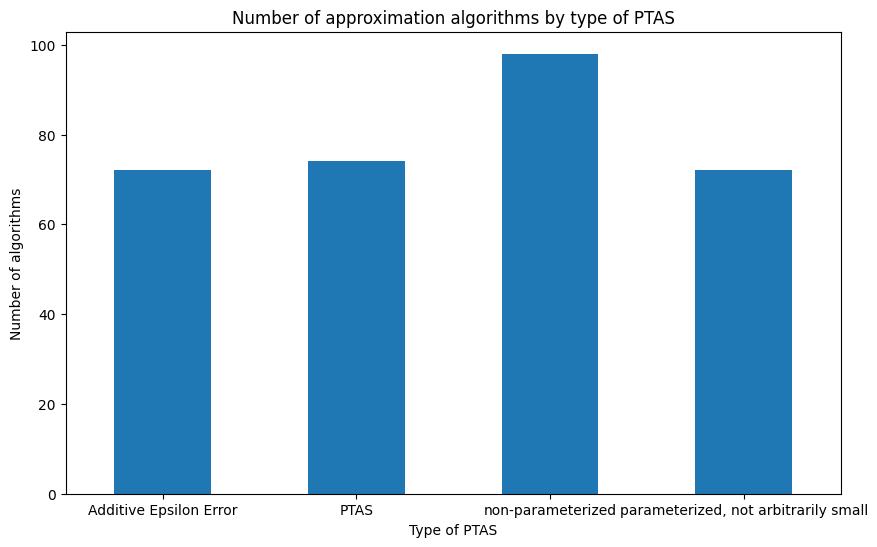

In [37]:
data = approximation_algorithms.copy()

# plot
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby('Type of PTAS (if PTAS)').size().plot(kind='bar', ax=ax)

# rotate x labels
plt.xticks(rotation=0)

plt.xlabel('Type of PTAS')
plt.ylabel('Number of algorithms')
plt.title('Number of approximation algorithms by type of PTAS')
plt.show()

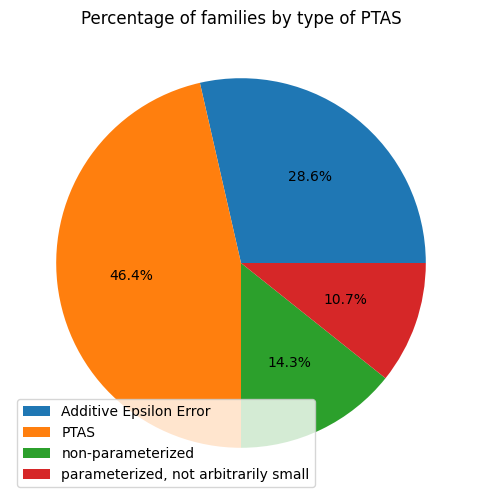

In [40]:
data = approximation_algorithms.copy()

# group by family, if at least one algorithm in the family is arbitrary small parameterized error, then the family is arbitrary small parameterized error
# if at least one algorithm in the family is parameterized, not arbitrarily small, then the family is parameterized, non-PTAS
# if at least one algorithm in the family is non-parameterized, then the family is non-parameterized

data['Type of PTAS (if PTAS)'] = data.groupby('Family Name')['Type of PTAS (if PTAS)'].transform(
    lambda x: 'PTAS' if 'PTAS' in x.values else (
        'Additive Epsilon Error' if 'Additive Epsilon Error' in x.values else (
            'parameterized, not arbitrarily small' if 'parameterized, not arbitrarily small' in x.values else 'non-parameterized'
        )
    )
)

data = data.drop_duplicates(subset=['Family Name', 'Type of PTAS (if PTAS)'])


# sort by type of PTAS
data.sort_values(by='Type of PTAS (if PTAS)', inplace=True)



# plot percentage of families by type of PTAS
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby('Type of PTAS (if PTAS)').size().plot(kind='pie', autopct='%1.1f%%', ax=ax, labels=None)

ax.legend(loc=3, labels=data['Type of PTAS (if PTAS)'].unique())





plt.title('Percentage of families by type of PTAS')
plt.show()

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_25279/2042333470.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage = data.groupby('Type of PTAS (if PTAS)').size() / data['Family Name'].nunique() * 100


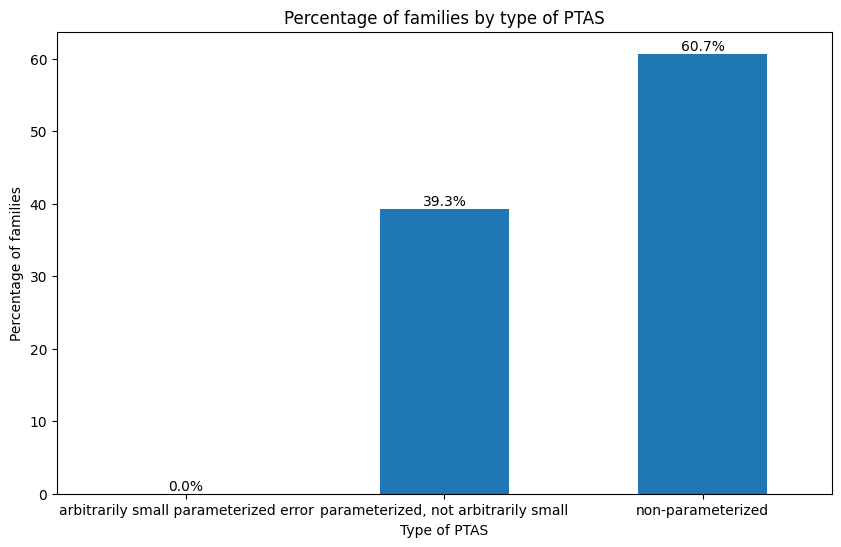

In [ ]:
data = approximation_algorithms.copy()

# group by family, if at least one algorithm in the family is arbitrary small parameterized error, then the family is arbitrary small parameterized error
# if at least one algorithm in the family is parameterized, not arbitrarily small, then the family is parameterized, not arbitrarily small
# if at least one algorithm in the family is non-parameterized, then the family is non-parameterized

data['Type of PTAS (if PTAS)'] = data.groupby('Family Name')['Type of PTAS (if PTAS)'].transform(
    lambda x: 'arbitrarily small parameterized error' if 'arbitrarily small parameterized error' in x.values else (
        'parameterized, not arbitrarily small' if 'parameterized, not arbitrarily small' in x.values else 'non-parameterized')
)

data = data.drop_duplicates(subset=['Family Name', 'Type of PTAS (if PTAS)'])

# follow the order arbitrarily small parameterized error, parameterized, not arbitrarily small, non-parameterized
data['Type of PTAS (if PTAS)'] = pd.Categorical(
    data['Type of PTAS (if PTAS)'], categories=['arbitrarily small parameterized error', 'parameterized, not arbitrarily small', 'non-parameterized'], ordered=True)

# sort by type of PTAS
data.sort_values(by='Type of PTAS (if PTAS)', inplace=True)



# calculate percentage of families by type of PTAS
percentage = data.groupby('Type of PTAS (if PTAS)').size() / data['Family Name'].nunique() * 100

# plot percentage of families by type of PTAS
fig, ax = plt.subplots(figsize=(10, 6))
# bar plot
percentage.plot(kind='bar', ax=ax)

# add percentage values on top of bars
for i, v in enumerate(percentage):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')

# rotate x labels
plt.xticks(rotation=0)

plt.xlabel('Type of PTAS')
plt.ylabel('Percentage of families')

plt.title('Percentage of families by type of PTAS')

plt.show()

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_25279/3400983682.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage = data.groupby(['Decade', 'Type of PTAS (if PTAS)']).size(


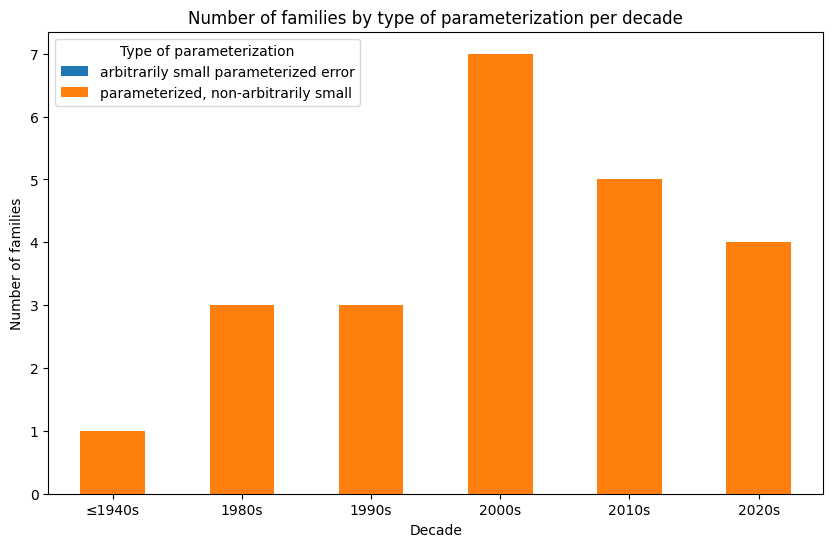

,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS),Parallel?,Quantum?,Decade
261,Optimal Binary Search Trees,1,1,Approximate OBST,Fredman [min-max tree],1975,3,0,3.00,additive,yes,"parameterized, non-arbitrarily small",0,0.0,1970
738,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...",Behnezhad [Theorem 1.3],2021,NaN,3,5.99,multiplicative-additive,yes,"parameterized, non-arbitrarily small",0,0.0,2020
184,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Chechik, Zhang [Theorem 1.3]",2022,5.01,3.01,1.99,multiplicative-additive,yes,"parameterized, non-arbitrarily small",0,0.0,2020
225,Maximum Cardinality Matching,1,1,"MCM Size, Sparse (Approximate)","Onak, Ron, Rosen, Rubinfeld (implicit)",2011,NaN,3,5.99,multiplicative-additive,yes,"parameterized, non-arbitrarily small",0,0.0,2010
306,Maximum-Weight Matching,1,1,"MWM, General, Integer Weights (Approximate)","Duan, Pettie, Su",2011,5,2,0.00,multiplicative,yes,"parameterized, non-arbitrarily small",0,0.0,2010
191,LU Decomposition,1,1,Approximate Rectangular Matrix LU Decomposition,Randomized LU Decomposition,2018,4.5,0,7.00,additive,yes,"parameterized, non-arbitrarily small",0,0.0,2010
338,Nearest Neighbor Search,1,1,k-ANNS for a dense 3D map of geometric points,Projected radial search,2013,3,2.9,0.00,multiplicative,yes?,"parameterized, non-arbitrarily small",0,0.0,2010
186,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, Path-Reporting, w...","Elkin, Pettie [Theorem 6.6]",2016,6.01,7,0.00,multiplicative,no,"parameterized, non-arbitrarily small",0,0.0,2010
298,Maximum-Weight Matching,1,1,"MWM, General (Approximate)","Drake, Hougardy",2003,5,2.5,0.00,multiplicative,yes,"parameterized, non-arbitrarily small",0,0.0,2000
1,Sorting,1,1,Approximate Sorting,NaN,2006,3,0,6.99,additive,yes,"parameterized, non-arbitrarily small",0,0.0,2000


In [ ]:
data = approximation_algorithms.copy()

# group by decade and family
data['Decade'] = data['Year'] // 10 * 10
# sort by decade
data.sort_values(by='Decade', inplace=True)

# merge decades <= 1930 into 1930
data.loc[data['Decade'] <= 1940, 'Decade'] = 1940

# group by decade and family
data['Type of PTAS (if PTAS)'] = data.groupby(['Decade', 'Family Name'])['Type of PTAS (if PTAS)'].transform(
    lambda x: 'arbitrarily small parameterized error' if 'arbitrarily small parameterized error' in x.values else (
        'parameterized, non-arbitrarily small' if 'parameterized, not arbitrarily small' in x.values else 'non-parameterized')
)

data = data.drop_duplicates(subset=['Decade', 'Family Name', 'Type of PTAS (if PTAS)'])


# remove non-parameterized families
data = data[data['Type of PTAS (if PTAS)'] != 'non-parameterized']

# follow the order arbitrarily small parameterized error, parameterized, not arbitrarily small, non-parameterized
data['Type of PTAS (if PTAS)'] = pd.Categorical(
    data['Type of PTAS (if PTAS)'], categories=['arbitrarily small parameterized error', 'parameterized, non-arbitrarily small'], ordered=True)

# sort by type of PTAS
data.sort_values(by='Type of PTAS (if PTAS)', inplace=True)

# plot percentage of families by type of PTAS per decade
fig, ax = plt.subplots(figsize=(10, 6))


# calculate percentage of families by type of PTAS per decade
percentage = data.groupby(['Decade', 'Type of PTAS (if PTAS)']).size(
) 

# unstack the data
percentage = percentage.unstack()

# bar plot
percentage.plot(kind='bar', stacked=True, ax=ax)

# rotate x labels
plt.xticks(rotation=0)

# first x label to ≤1940s
labels = [item.get_text() + 's' for item in ax.get_xticklabels()]
labels[0] = '≤1940s'
ax.set_xticklabels(labels)

plt.legend(title='Type of parameterization')

plt.xlabel('Decade')
plt.ylabel('Number of families')
plt.title('Number of families by type of parameterization per decade')
plt.show()

data